# Customer segmentation using K Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load the data
df = pd.read_csv(r"E:\MLIoT\ML\dataset\Wholesale customers data.csv")
df.shape

(440, 8)

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df2 = df[['Fresh','Milk']]

In [5]:
df2.head()

,Fresh,Milk
0,12669,9656
1,7057,9810
2,6353,8808
3,13265,1196
4,22615,5410


In [6]:
# applying clustering using kmeans k = 3
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=5,max_iter=400)
model.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [7]:
model.cluster_centers_

array([[ 4992.68817204,  6019.75268817],
       [44622.5625    , 12838.09375   ],
       [19063.94573643,  3566.10077519]])

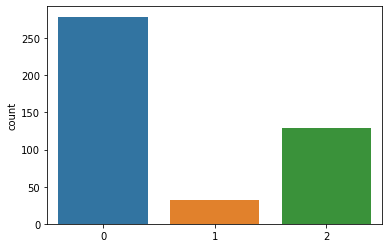

In [8]:
sns.countplot(model.labels_)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


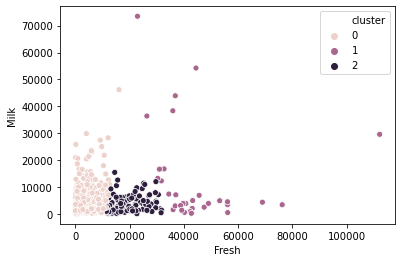

In [10]:
df2['cluster'] = model.labels_
sns.scatterplot(x='Fresh',y='Milk',hue='cluster',data=df2)
plt.show()

In [12]:
df2[df2.cluster==1].max()

Fresh      112151
Milk        73498
cluster         1
dtype: int64

In [13]:
KMeans?

In [14]:
df3 = df[['Fresh','Milk','Frozen','Grocery']]

In [15]:
model2 = KMeans(n_clusters=3,random_state=5)
model2.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [16]:
model2.cluster_centers_

array([[ 8234.99093656,  3824.33836858,  2568.73716012,  5322.42296073],
       [ 8119.69387755, 18812.93877551,  2011.42857143, 27745.36734694],
       [35941.4       ,  6044.45      ,  6713.96666667,  6288.61666667]])

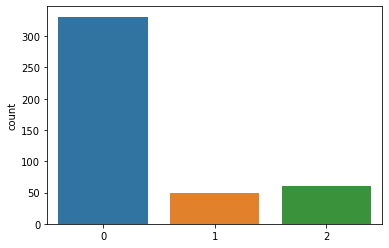

In [17]:
sns.countplot(model2.labels_)
plt.show()

# Elbow method to get the best value of k

In [22]:
df2 = df[['Fresh','Milk']]

In [23]:
k =[]
inertia = []
for i in range(1,15):
    k.append(i)
    model = KMeans(n_clusters=i,random_state=5)
    model.fit(df2)
    inertia.append(model.inertia_)

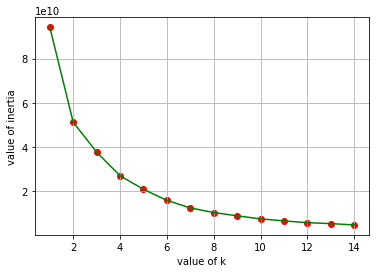

In [24]:
plt.plot(k,inertia,c='g')
plt.scatter(k,inertia,c='r')
plt.grid(True)
plt.xlabel("value of k")
plt.ylabel("value of inertia")
plt.show()

In [25]:
model = KMeans(n_clusters=4,random_state=5)
model.fit(df2)
model.cluster_centers_

array([[ 5387.01351351,  5686.52702703],
       [20705.27586207,  4108.67241379],
       [30445.        , 48782.66666667],
       [50049.68181818,  4447.40909091]])